# NEU-Regression: Simulation Experiments
---

### Functions from the paper:
 - 1) $\min\{\exp(\frac{-1}{(1+x)^2}),x+\cos(x)\}$. Reason: Evaluate performance for pasted functions and general badness.
 - 2) $\cos(\exp(-x))$.  Reason: Evaluate performance for non-periodic osculations.
 - 3) $I_{(-\infty,\frac1{2})}$.  Reason: Evaluation performance on a single jump.  
 
 ---

# Generate Training Data

In [62]:
# Load Dependances and makes path(s)
exec(open('Initializations_Dump.py').read())
# Load Hyper( and meta) parameter(s)
exec(open('HyperParameter_Grid.py').read())

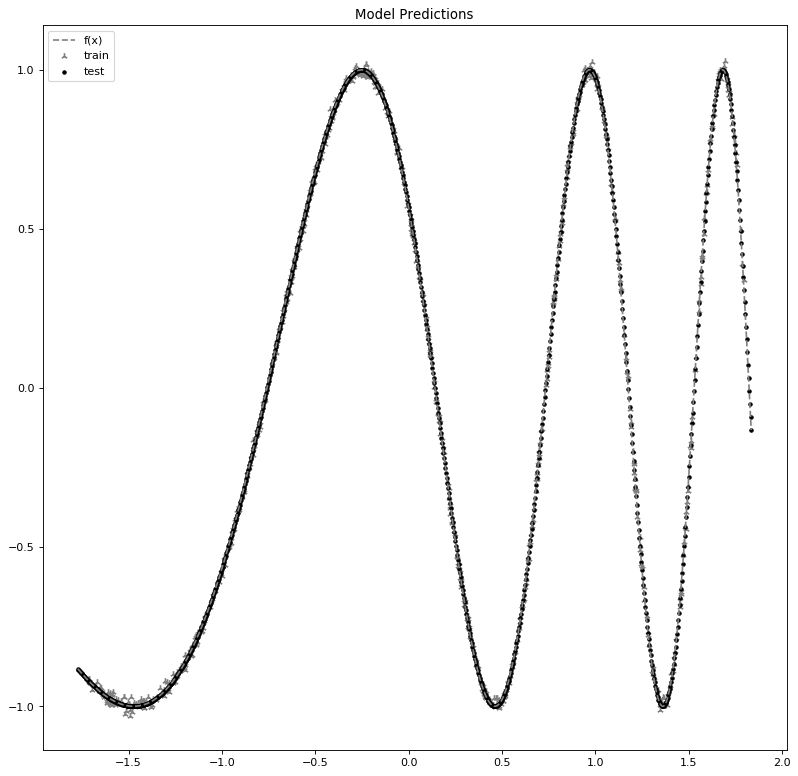

In [63]:
#------------------------#
# Run External Notebooks #
#------------------------#
# Generate Data
Option_Function = "oscilatory"
%run Data_Generator.ipynb

In [64]:
if d<= 1:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    # Bump Dimension so Reconfiguration network properties hold
    data_x = np.concatenate([data_x,data_x**2],axis=1)
    data_x_test = np.concatenate([data_x_test,data_x_test**2],axis=1)
    d = d+1
    data_x_raw = data_x
else:
    # Backup data
    data_x_raw = data_x
    data_x_test_raw = data_x_test
    print(d)

## Initializations:
- Load Dependancies,
- Makes Paths if missing.

In [51]:
# Load Hyper( and meta) parameter(s)
# %run Helper_Functions.ipynb
exec(open('Helper_Functions.py').read())
# Load Models
# %run Architecture_Builder.ipynb
exec(open('Architecture_Builder.py').read())

Complete NEU-Structure Building Procedure!!!
Complete NEU-ffNN Training Procedure!!!
Deep Feature Builder - Ready
Complete NEU-ffNN Training Procedure!!!
Complete NEU-ffNN Training Procedure!!!


#### Prepare data for NEU

## 1) Get Basic Regression Models
 1. Get Base regression model (benchmark),
 2. Get Base regression model for NEU.

## Get basic regression model - Benchmark

In [5]:
if False:#os.path.exists('./outputs/models/Benchmarks/Linear_Regression/saved_model.pb'):
    #------------------#
    # Load Readout Map #
    #------------------#
    print('Benchmark model - already exists: Loading...')
    regression_Benchmark = tf.keras.models.load_model("./outputs/models/Benchmarks/Linear_Regression/")
    print('Benchmark model - already exists: Loaded.')
else:
    print('Pre-trained benchmark model does not exist: Training.')
    tf.random.set_seed(2020)
    ffNN_y_hat_train,ffNN_y_hat_test = build_ffNN(n_folds = CV_folds, 
                                                 n_jobs = n_jobs, 
                                                 n_iter = n_iter, 
                                                 param_grid_in = param_grid_Vanilla_Nets, 
                                                 X_train = data_x, 
                                                 y_train = data_y,
                                                 X_test = data_x_test)

Pre-trained benchmark model does not exist: Training.
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    6.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    6.9s finished


Epoch 1/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5695 - mse: 0.4510 - mae: 0.5695 - mape: 127.2417
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5251 - mse: 0.4092 - mae: 0.5251 - mape: 152.5006
Epoch 3/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5216 - mse: 0.4141 - mae: 0.5216 - mape: 157.3020
Epoch 4/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5237 - mse: 0.4151 - mae: 0.5237 - mape: 146.7481
Epoch 5/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5184 - mse: 0.4121 - mae: 0.5184 - mape: 160.8445
Epoch 6/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5191 - mse: 0.4150 - mae: 0.5191 - mape: 156.3949
Epoch 7/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5163 - mse: 0.4142 - mae: 0.5163 - mape: 158.1215
Epoch 8/50
47/47 [==============================] - 0s 2ms/step - loss: 0.5148 - mse: 0.4146 - mae: 0.5148 - mape: 155.6861
Epoch 9/

# Train NEU-OLS

### 1 + 2) Learn Linearizing Feature map and Train OLS

In [7]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Obtain NEU-OLS predictions and Model
NEU_OLS_y_hat_train_pre, NEU_OLS_y_hat_test_pre, NEU_OLS = build_NEU_OLS(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Feature_Only_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)
# Extract Linearizing Feature Map
Linearizing_Feature_Map = extract_trained_feature_map(NEU_OLS.model)

# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
data_x_featured_train = Linearizing_Feature_Map.predict(data_x)
data_x_featured_test = Linearizing_Feature_Map.predict(data_x_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,NEU_OLS_y_hat_train_pre.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,NEU_OLS_y_hat_test_pre.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Extract Feature Data Only (for De-coupled Implementations of Step 2) #
#----------------------------------------------------------------------#
data_x_NEU_train_feature_only = data_x_NEU_train[:,:d]
data_x_NEU_test_feature_only = data_x_NEU_test[:,:d]

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.1min finished


Epoch 1/50
47/47 [==============================] - 1s 18ms/step - loss: 0.6584 - mse: 0.5315 - mae: 0.6575 - mape: 110.0501
Epoch 2/50
47/47 [==============================] - 1s 14ms/step - loss: 0.6202 - mse: 0.4815 - mae: 0.6193 - mape: 135.6675
Epoch 3/50
47/47 [==============================] - 1s 14ms/step - loss: 0.6039 - mse: 0.4737 - mae: 0.6029 - mape: 157.3332
Epoch 4/50
47/47 [==============================] - 1s 13ms/step - loss: 0.5883 - mse: 0.4753 - mae: 0.5871 - mape: 176.0390
Epoch 5/50
47/47 [==============================] - 1s 14ms/step - loss: 0.5791 - mse: 0.4796 - mae: 0.5778 - mape: 184.3700
Epoch 6/50
47/47 [==============================] - 1s 15ms/step - loss: 0.5634 - mse: 0.4549 - mae: 0.5621 - mape: 165.4757
Epoch 7/50
47/47 [==============================] - 1s 14ms/step - loss: 0.5589 - mse: 0.4506 - mae: 0.5576 - mape: 151.7658
Epoch 8/50
47/47 [==============================] - 1s 14ms/step - loss: 0.5471 - mse: 0.4355 - mae: 0.5458 - mape: 154.4758


In [13]:
# 2) Perform Linear Regression on Feature-Space #
#===============================================#
NEU_lin_reg = LinearRegression()
NEU_lin_reg.fit(data_x_featured_train,data_y)
# NEU_OLS_Internal = NEU_lin_reg.predict(data_x_featured_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Produce Prediction(s)
NEU_OLS_y_hat_train = NEU_lin_reg.predict(data_x_featured_train)
NEU_OLS_y_hat_test = NEU_lin_reg.predict(data_x_featured_test)
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_OLS_y_hat_train.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_OLS_y_hat_test.reshape(data_x_featured_test.shape[0],D)],axis=1)
# 3) Learn Structure Map #
#========================#
NEU_OLS_y_hat_train, NEU_OLS_y_hat_test = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.2s finished


Epoch 1/50
47/47 [==============================] - 0s 4ms/step - loss: 0.6229 - mse: 0.4790 - mae: 0.6220 - mape: 104.6749
Epoch 2/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5897 - mse: 0.4424 - mae: 0.5888 - mape: 118.4102
Epoch 3/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5577 - mse: 0.4238 - mae: 0.5566 - mape: 132.0577
Epoch 4/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5380 - mse: 0.4185 - mae: 0.5367 - mape: 134.8097
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5320 - mse: 0.4141 - mae: 0.5308 - mape: 142.3796
Epoch 6/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5309 - mse: 0.4110 - mae: 0.5296 - mape: 138.6940
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5274 - mse: 0.4060 - mae: 0.5262 - mape: 130.6402
Epoch 8/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5319 - mse: 0.4075 - mae: 0.5308 - mape: 130.2391
Epoch 9/

### 3) Learn Structure Map

# Train NEU-ffNN

#### Fully-Coupled Implementation

#### A) $\rho\circ\hat{f}\circ \phi$

In [55]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train, NEU_ffNN_y_hat_test = build_NEU_ffNN(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.1min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.1min finished


Epoch 1/50
47/47 [==============================] - 1s 18ms/step - loss: 0.5819 - mse: 0.4609 - mae: 0.5807 - mape: 208.6081
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 0.5454 - mse: 0.4384 - mae: 0.5441 - mape: 243.2911
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 0.5396 - mse: 0.4368 - mae: 0.5382 - mape: 162.5695
Epoch 4/50
47/47 [==============================] - 1s 15ms/step - loss: 0.5425 - mse: 0.4393 - mae: 0.5411 - mape: 336.3439
Epoch 5/50
47/47 [==============================] - 1s 16ms/step - loss: 0.5305 - mse: 0.4319 - mae: 0.5291 - mape: 294.2240
Epoch 6/50
47/47 [==============================] - 1s 16ms/step - loss: 0.5244 - mse: 0.4291 - mae: 0.5230 - mape: 137.3777
Epoch 7/50
47/47 [==============================] - 1s 15ms/step - loss: 0.5115 - mse: 0.4108 - mae: 0.5101 - mape: 251.2789
Epoch 8/50
47/47 [==============================] - 1s 17ms/step - loss: 0.4264 - mse: 0.3283 - mae: 0.4250 - mape: 165.2504


#### B) $p\circ \rho(\hat{f}\circ \phi(\cdot),\cdot)$

In [68]:
tf.random.set_seed(2020)
NEU_ffNN_y_hat_train_w_proj, NEU_ffNN_y_hat_test_w_proj = build_NEU_ffNN_w_proj(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = param_grid_NEU_Nets, 
                                                           X_train = data_x, 
                                                           y_train = data_y,
                                                           X_test = data_x_test)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:  1.2min finished


Epoch 1/50
47/47 [==============================] - 1s 17ms/step - loss: 0.5771 - mse: 0.4756 - mae: 0.5758 - mape: 99.1640
Epoch 2/50
47/47 [==============================] - 1s 17ms/step - loss: 0.5439 - mse: 0.4282 - mae: 0.5426 - mape: 114.1481
Epoch 3/50
47/47 [==============================] - 1s 17ms/step - loss: 0.5399 - mse: 0.4376 - mae: 0.5385 - mape: 121.7487
Epoch 4/50
47/47 [==============================] - 1s 18ms/step - loss: 0.5419 - mse: 0.4270 - mae: 0.5407 - mape: 107.3866
Epoch 5/50
47/47 [==============================] - 1s 17ms/step - loss: 0.5352 - mse: 0.4167 - mae: 0.5340 - mape: 105.9206
Epoch 6/50
47/47 [==============================] - 1s 19ms/step - loss: 0.5321 - mse: 0.4187 - mae: 0.5308 - mape: 116.0022
Epoch 7/50
47/47 [==============================] - 1s 18ms/step - loss: 0.5344 - mse: 0.4207 - mae: 0.5331 - mape: 112.0730
Epoch 8/50
47/47 [==============================] - 1s 19ms/step - loss: 0.5208 - mse: 0.4027 - mae: 0.5195 - mape: 109.4861
E

#### Decoupled Implementation

In [11]:
tf.random.set_seed(2020)
# 1+2) Learn Linearizing Feature Map #
#====================================#
# Completed Above
print("Phase 1 Complete: Feature Map Trained/Loaded")

# 2) Train ffNN #
#===============#
NEU_ffNN_y_hat_train_dcpld, NEU_ffNN_y_hat_test_dcpld = build_ffNN(n_folds = CV_folds, 
                                                                   n_jobs = n_jobs, 
                                                                   n_iter = n_iter, 
                                                                   param_grid_in = param_grid_Vanilla_Nets,  
                                                                   X_train = data_x_NEU_train_feature_only, 
                                                                   y_train = data_y,
                                                                   X_test = data_x_NEU_test_feature_only)
# Pre-process Linearized Data #
#=============================#
# Get Linearized Predictions #
#----------------------------#
# Coerce data into form ready for NEU-Structure Map
data_x_NEU_train = np.concatenate([data_x_featured_train,
                                   NEU_ffNN_y_hat_train_dcpld.reshape(data_x_featured_train.shape[0],D)],axis=1)
data_x_NEU_test = np.concatenate([data_x_featured_test,
                                  NEU_ffNN_y_hat_test_dcpld.reshape(data_x_featured_test.shape[0],D)],axis=1)

# Update User #
#-------------#
print("Phase 2 Complete: Trained Vanilla Model")

# 3) Learn Structure Map #
#========================#
NEU_ffNN_y_hat_train_Dcpld, NEU_ffNN_y_hat_test_Dcpld = build_NEU_Structure(n_folds = CV_folds, 
                                                           n_jobs = n_jobs, 
                                                           n_iter = n_iter, 
                                                           param_grid_in = NEU_Structure_Dictionary, 
                                                           X_train = data_x_NEU_train, 
                                                           y_train = data_y,
                                                           X_test = data_x_NEU_test)

# Update User #
#-------------#
print("Phase 3 Complete: Trained NEU-Structure Map")
print("NEU Statue: Trained")

Phase 1 Complete: Feature Map Trained/Loaded
Fitting 2 folds for each of 1 candidates, totalling 2 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:    5.2s finished


Epoch 1/50
47/47 [==============================] - 0s 1ms/step - loss: 0.5361 - mse: 0.4106 - mae: 0.5361 - mape: 121.8575
Epoch 2/50
47/47 [==============================] - 0s 2ms/step - loss: 0.4575 - mse: 0.3814 - mae: 0.4575 - mape: 139.3839
Epoch 3/50
47/47 [==============================] - 0s 1ms/step - loss: 0.4610 - mse: 0.3849 - mae: 0.4610 - mape: 158.2748
Epoch 4/50
47/47 [==============================] - 0s 1ms/step - loss: 0.4537 - mse: 0.3640 - mae: 0.4537 - mape: 138.6116
Epoch 5/50
47/47 [==============================] - 0s 1ms/step - loss: 0.4526 - mse: 0.3700 - mae: 0.4526 - mape: 148.0361
Epoch 6/50
47/47 [==============================] - 0s 1ms/step - loss: 0.4517 - mse: 0.3645 - mae: 0.4517 - mape: 138.9252
Epoch 7/50
47/47 [==============================] - 0s 1ms/step - loss: 0.4542 - mse: 0.3783 - mae: 0.4542 - mape: 144.4294
Epoch 8/50
47/47 [==============================] - 0s 1ms/step - loss: 0.4519 - mse: 0.3674 - mae: 0.4519 - mape: 140.2251
Epoch 9/

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.9s remaining:    0.0s
[Parallel(n_jobs=3)]: Done   2 out of   2 | elapsed:   11.9s finished


Epoch 1/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6472 - mse: 0.5125 - mae: 0.6464 - mape: 104.9336
Epoch 2/50
47/47 [==============================] - 0s 3ms/step - loss: 0.6151 - mse: 0.4659 - mae: 0.6143 - mape: 103.7558
Epoch 3/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5895 - mse: 0.4344 - mae: 0.5886 - mape: 112.1786
Epoch 4/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5620 - mse: 0.4037 - mae: 0.5611 - mape: 113.8587
Epoch 5/50
47/47 [==============================] - 0s 3ms/step - loss: 0.5467 - mse: 0.3923 - mae: 0.5458 - mape: 143.2745
Epoch 6/50
47/47 [==============================] - 0s 4ms/step - loss: 0.5186 - mse: 0.3732 - mae: 0.5176 - mape: 140.5580
Epoch 7/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4992 - mse: 0.3656 - mae: 0.4981 - mape: 149.8939
Epoch 8/50
47/47 [==============================] - 0s 3ms/step - loss: 0.4843 - mse: 0.3672 - mae: 0.4831 - mape: 169.4625
Epoch 9/

---
---
---

# Benchmark Models

Run univariate regression benchmarks file:

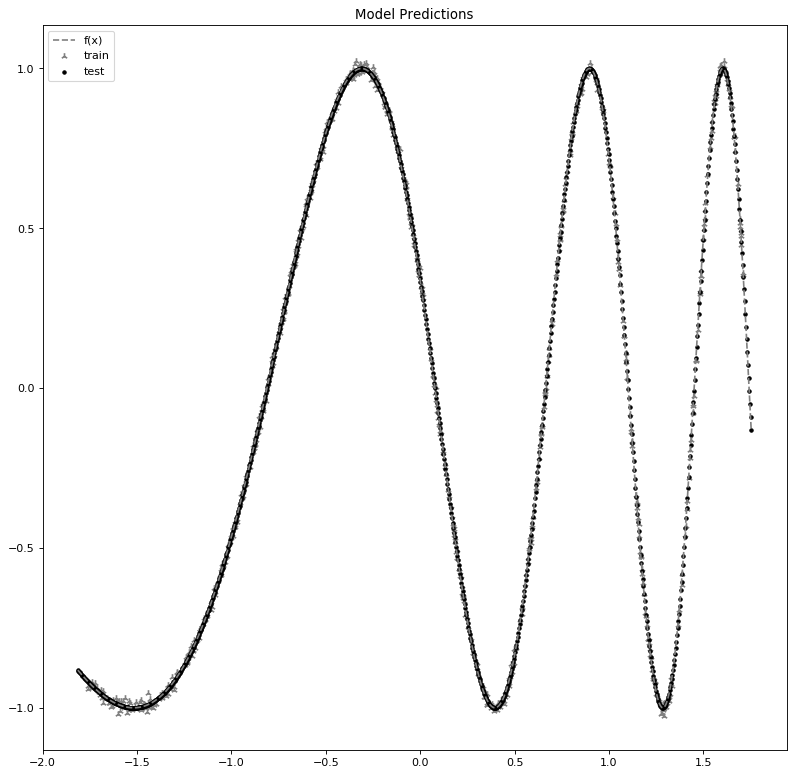

In [69]:
# Run Univariate Regression File #
#--------------------------------#
%run Data_Generator.ipynb
%run Univariate_Regression_Benchmark_Models.ipynb

# Visualize Predictions

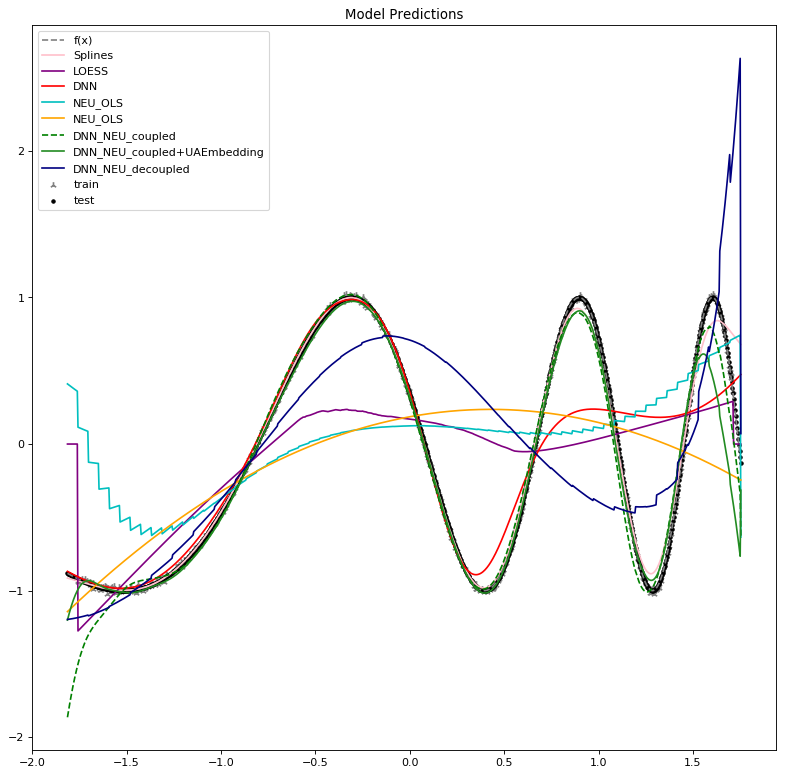

In [71]:
# Initialize Plot #
#-----------------#
plt.figure(num=None, figsize=(12, 12), dpi=80, facecolor='w', edgecolor='k')

# Generate Plots #
#----------------#

# Plot Signal
plt.plot(np.array(data_x_test).reshape(-1,),data_y_test,color='gray',label='f(x)',linestyle='--')
# Plot Data
plt.scatter(np.array(data_x).reshape(-1,),data_y,color='gray',label='train', marker = '2')
plt.scatter(np.array(data_x_test).reshape(-1,),data_y_test,color='black',label='test', marker = '.')

#--------------------#
# Benchmark Model(s) #
#--------------------#
# Plot Non-Linar Benchmark(s): Classical
plt.plot(np.array(data_x_test).reshape(-1,),f_hat_smoothing_splines_test,color='pink',label='Splines')
plt.plot(np.array(data_x_test).reshape(-1,),LOESS_prediction_test,color='purple',label='LOESS')
# Plot Benchmark(s): DNNs
plt.plot(np.array(data_x_test).reshape(-1,),ffNN_y_hat_test, color = 'red', label='DNN')

#--------------#
# NEU-Model(s) #
#--------------#
# Plot NEU-OLS
plt.plot(np.array(data_x_test).reshape(-1,),NEU_OLS_y_hat_test, color = 'c',label='NEU_OLS')
plt.plot(np.array(data_x_test).reshape(-1,),OLS_y_hat_test, color = 'orange',label='NEU_OLS')
# # Plot NEU Regressors
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test, linestyle="--", color = 'green',label='DNN_NEU_coupled')
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test_w_proj, color = 'forestgreen',label='DNN_NEU_coupled+UAEmbedding')
plt.plot(np.array(data_x_test).reshape(-1,),NEU_ffNN_y_hat_test_Dcpld, color = 'navy',label='DNN_NEU_decoupled')

# Format Plot #
#-------------#
plt.legend(loc="upper left")
plt.title("Model Predictions")
plt.show()

 ---

## Performance Report

In [60]:
#--------------------#
# Classical Model(s) #
#--------------------#
# NEU-OLS Performance
print("OLS-Performance:")
print(reporter(OLS_y_hat_train,OLS_y_hat_test,data_y,data_y_test))

# NEU-OLS Performance
print("NEU-OLS-Performance:")
print(reporter(NEU_OLS_y_hat_train,NEU_OLS_y_hat_test,data_y,data_y_test))

OLS-Performance:
            train         test
MAE      0.544544     0.532620
MSE      0.414917     0.407031
MAPE  2329.797489  2031.170409
NEU-OLS-Performance:
           train         test
MAE     0.562536     0.568628
MSE     0.430795     0.440246
MAPE  662.079755  1199.411446


In [33]:
# Splines Performance
print("Splines-Performance:")
print(reporter(f_hat_smoothing_splines_train,f_hat_smoothing_splines_test,data_y,data_y_test))

# Loess Performance
print("LOESS Performance:")
print(reporter(LOESS_prediction_train,LOESS_prediction_test,data_y,data_y_test))

Splines-Performance:
          train      test
MAE    0.037015  0.038915
MSE    0.004704  0.009123
MAPE  11.289286  9.167580
LOESS Performance:
            train      test
MAE      0.469268  0.476233
MSE      0.324204  0.336818
MAPE  1602.489068       inf


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  


In [72]:
#--------------#
# DNN Model(s) #
#--------------#
# ffNN Performance
print("ffNN-Performance:")
print(reporter(ffNN_y_hat_train,ffNN_y_hat_test,data_y,data_y_test))

# NEU-ffNN Performance
print("NEU-ffNN (Coupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train,NEU_ffNN_y_hat_test,data_y,data_y_test))
print("NEU-ffNN (Coupled+UAEmbedding) Performance:")
print(reporter(NEU_ffNN_y_hat_train_w_proj,NEU_ffNN_y_hat_test_w_proj,data_y,data_y_test))
print("NEU-ffNN (Decoupled) Performance:")
print(reporter(NEU_ffNN_y_hat_train_Dcpld,NEU_ffNN_y_hat_test_Dcpld,data_y,data_y_test))

ffNN-Performance:
           train        test
MAE     0.265575    0.202885
MSE     0.162504    0.132420
MAPE  167.432871  121.986406
NEU-ffNN (Coupled) Performance:
          train       test
MAE    0.106759   0.085754
MSE    0.023284   0.023148
MAPE  42.780351  32.706908
NEU-ffNN (Coupled+UAEmbedding) Performance:
           train        test
MAE     0.233753    0.074992
MSE     0.119892    0.025971
MAPE  153.750463  122.899092
NEU-ffNN (Decoupled) Performance:
           train        test
MAE     0.417426    0.462792
MSE     0.319139    0.419152
MAPE  274.245370  243.960531


#### The END

---